In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams
import numpy as np
rcParams['figure.figsize'] = 20,10

pd.set_option('display.max_columns', 500)
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/My Drive/')

In [ ]:
#emails=pd.read_csv('dataset_30users.csv')
emails=pd.read_csv('dataset_35usersfinal.csv')
emails.head()

,Unnamed: 0,Date,From,To,Subject,Mail,X-Origin,user
0,0,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,tim.belden@enron.com,None,Here is our forecast,Allen-P,allen-p
1,1,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,Re:,Traveling to have a business meeting takes the...,Allen-P,allen-p
2,2,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,test successful. way to go!!!,Allen-P,allen-p
3,3,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,randall.gay@enron.com,None,"Randy, Can you send me a schedule of the sal...",Allen-P,allen-p
4,4,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,Allen-P,allen-p


In [ ]:
emails.Date=pd.to_datetime(emails.Date) #.values[100:200]

In [ ]:
emails.drop(labels=['Unnamed: 0','X-Origin'],axis=1,inplace=True)

In [ ]:
emails.columns

Index(['Date', 'From', 'To', 'Subject', 'Mail', 'user'], dtype='object')

In [ ]:
#check duplicates
emails.duplicated(subset=['Date','From','To','Subject','Mail'],keep='first').value_counts()

False    63633
True      3796
dtype: int64

In [ ]:
emails.duplicated(subset=['Date','From','To','Subject','Mail','user'],keep='first').value_counts()

False    66535
True       894
dtype: int64

In [ ]:
emails.drop_duplicates(subset=['Date','From','To','Subject','Mail','user'],keep='first',inplace=True)

In [ ]:
emails.shape

(66535, 6)

In [ ]:
#len(set(emails['X-Origin'].str.lower()))
#liste_user=set(emails['X-Origin'].str.lower())

In [ ]:
print(len(set(emails['user'].str.lower())))
liste_user=emails['user'].str.lower()

35


In [ ]:
liste_user.value_counts()

dasovich-j     16295
farmer-d        5332
beck-s          4994
blair-l         3233
campbell-l      3170
bass-e          3087
arnold-j        2648
cash-m          2273
baughman-d      2025
corman-s        1981
buy-r           1911
dean-c          1784
fossum-d        1551
derrick-j       1431
allen-p         1398
dorland-c       1307
davis-d         1172
donoho-l        1045
delainey-d      1002
causholli-m      935
carson-m         906
cuilla-m         764
forney-j         729
ermis-f          713
fischer-m        711
donohoe-t        687
benson-r         602
brawner-s        593
gang-l           590
gay-r            565
crandell-s       519
arora-h          492
bailey-s         461
badeer-r         324
dickson-s        199
Name: user, dtype: int64

In [ ]:
emails[emails.user=='delainey-d'].From.value_counts()

david.delainey@enron.com             762
kay.chapman@enron.com                 96
w..delainey@enron.com                 59
beverly.stephens@enron.com            28
rosalee.fleming@enron.com              5
daniel.brown@enron.com                 3
administration.enron@enron.com         3
enron.announcements@enron.com          2
wes.colwell@enron.com                  2
janet.dietrich@enron.com               2
no.address@enron.com                   2
james.steffes@enron.com                2
david.roland@enron.com                 2
tharsilla.broussard@enron.com          2
enron_update@concureworkplace.com      2
shona.wilson@enron.com                 2
david.oxley@enron.com                  2
brett.wiggs@enron.com                  2
david.maxwell@enron.com                1
vicki.sharp@enron.com                  1
michael.guerriero@enron.com            1
alisha@bp-inc.net                      1
public.relations@enron.com             1
t.campbell@enron.com                   1
jeff.donahue@enr

In [ ]:
emails.duplicated().value_counts()

False    67429
dtype: int64

In [ ]:
emails[emails.duplicated(subset=['Date','From','To', 'Mail'],keep='first')].Mail[2219]

'Ken Lay and Jeff Skilling were interviewed on CNNfn to discuss the succession  of Jeff to CEO of Enron.  We have put the interview on IPTV for your viewing  pleasure.  Simply point your web browser to http://iptv.enron.com, click the  link for special events, and then choose "Enron\'s Succession Plan."  The  interview will be available every 15 minutes through Friday, Dec. 15.'

In [ ]:
emails.Mail[204]

"Mac,  I checked into executing my options with Smith Barney.  Bad news.  Enron has  an agreement with Paine Webber that is exclusive.  Employees don't have the  choice of where to exercise.  I still would like to get to the premier  service account, but I will have to transfer the money.    Hopefully this will reach you.  Phillip"

In [ ]:
destinataire_none=emails[emails.To=='None']
len(destinataire_none)

4516

In [ ]:
destinataire_none.Mail.value_counts()[0:20]

 As you know, this is an unprecedented time in Enron's history.  We must adapt our employee programs to fit the immediate needs of our company during this time of transition.  It is especially difficult to announce the immediate suspension of the following programs.  ?\tClickAtHome - Enron has suspended the ClickAtHome program.  The program will no longer accept new participants, PC orders, or Internet service orders.  Orders submitted and confirmed prior to November 20, 2001 will be honored.  Enron will also discontinue subsidized Internet service.  Effective January 1, 2002, employees who are currently subscribers to subsidized Internet service will be switched to the regular commercial rate of their service provider and be responsible for the entire cost of the service. ?\tMatching Gifts and Volunteer Incentive Program (VIP) - Enron's Matching Gift program and VIP grants have been suspended indefinitely.  As we consider the immediate needs of all employees during this trying time, i

In [ ]:
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub("  ", "", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub(",|\.|!|\?|\"", "-", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub("\'", "", elem))      
    df[text_field] = df[text_field].apply(lambda elem: re.sub("\/|hou|ect|-+|[0-9]|\@ect|\*|\@enron|\@|\(|\)|\t|\_|\$|\<|\>|\[|\]|\+|=|:", "-", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub("  ", "", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub("-", " ", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub("\s+", " ", elem,flags=re.I))  

    return df
emails_clean = clean_text(emails, "Mail")


In [ ]:
def  clean_text(df, text_field):
    #df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub("  ", " ", elem))  
    #df[text_field] = df[text_field].apply(lambda elem: re.sub(",|\.|!|\?|\"", "-", elem))  
    #df[text_field] = df[text_field].apply(lambda elem: re.sub("\'", "", elem))      
    df[text_field] = df[text_field].apply(lambda elem: re.sub("\/|hou|ect|-+|[0-9]|\@ect|\*|\@enron|\@|\(|\)|\t|\_|\$|\<|\>|\[|\]|\+|=|:", "-", elem))  
    #df[text_field] = df[text_field].apply(lambda elem: re.sub("  ", "", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub("-", " ", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub("\s+", " ", elem,flags=re.I))  

    return df
emails_clean = clean_text(emails, "Mail")


In [ ]:
emails_clean.Mail[5000]
#facilitieshelpdesk

' kay the financial trading database under lotus notes would be the definitive source regarding the intercompany master agreements let me know if you want be conduct such search susan original message from heard marie sent wednesday january pm to bailey susan subj fw intercompany trading contracts susan kay asked me to forward this to you marie original message from mann kay sent wednesday january pm to heard marie; panus stephanie; fitzgerald genia; jones tana; hill robin cc tweed sheila; clark barton subj intercompany trading contracts ive been tasked with trying to get a handle on intercompany trading contracts what would be the most efficient way of coming up with a list thanks kay'

In [ ]:
emails.Mail[2]

'test successful way to go '

In [ ]:
emails_clean.Mail[120]

'can you build something to look at historical prices from where we savedcurves each night here is an example that pulls socal only improvements could include a drop down menu to choose any curve and a choiceof index gd or our curves '

In [ ]:
def  clean_subject(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub("(\/|hou|ect)|-+|[0-9]|\@ect|\*|\@enron|:|=|,|\@|\'|\.|\(|\)|\t|\_|\$|\<|\>|\[|\]", " ", elem))  

    return df
emails_clean = clean_subject(emails_clean, "Subject")

In [ ]:
#emails_test=emails_clean[0:100]

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [ ]:
from nltk.corpus import wordnet

documents=[]
for elem in emails_clean.Mail.values:
  document=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(elem)]
  document = ' '.join(document)
  documents.append(document)
#print(documents)

In [ ]:
from nltk.corpus import wordnet
documents_subject=[]
for elem in emails_clean.Subject.values:
  document=[lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(elem)]
  document = ' '.join(document)
  documents_subject.append(document)
#print(documents)

In [ ]:
emails_clean[emails_clean.Subject=='none'].Mail.value_counts()

calendar entry eventdescription date duration days chairperson outlook migration teamdetailed description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [ ]:
#stopwords.words('english')
documents[0:5]

['thanks larry lawrence aciscon enron broadband servicesinc vp software archit ureloop central drsuite phone ston txlarry cisconnet jeff youngflesh pm tolarry ciscon enron communicationscommunications ccjennifer stewart na enron kim godfrey enron communicationscommunications subj reenron avaya meetingscalendarlarry thank you for getting back with me to answer your question it is looking more and more like the week of januaryth the meetings would be held using approximately days of a day window theththand th i have input from kim godfreywho is driving things on the ebs sideand i have a tentative ok from avaya for the window of theth th i will want to begin getting headcount of the ebs travelersand the day swhich each would be attending for exampleyou would probably attend both dayswhile some of your team would be there exclusively for thend day meetings i m not sure jim crowder would be at both daysbut kim gcertainly wouldas would members of her origination teamincluding systems enginee

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
#print(tfidfconverter.inverse_transform(documents))
#print(tfidfconverter.get_feature_names())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
tfidf_matrix = tfidfconverter.fit_transform(documents)
df_mail = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidfconverter.get_feature_names())


In [ ]:
tfidf_matrix = tfidfconverter.fit_transform(documents_subject)
df_subject = pd.DataFrame(tfidf_matrix.toarray(), columns = tfidfconverter.get_feature_names())

In [ ]:
df_subject

,ab,abx,acceptance,access,accomplishment,accord,account,accounting,acquisition,acr,action,activity,actual,actuals,add,addition,additional,address,adjustment,advantage,advice,advisory,aep,affair,affiliate,afternoon,aga,agency,agenda,agent,agreement,ahead,air,airline,airway,al,alert,alj,allen,allocation,alternate,alternative,alumnus,amazon,amend,amendment,america,american,amp,analysis,analyst,andy,angelides,anniversary,announce,announcement,announces,annual,another,ansi,answer,application,appointment,approach,approval,approve,apr,april,area,arem,article,asap,ask,assessment,asset,assignment,assistance,associate,association,astros,attach,attachment,attend,attendee,attention,attorney,auction,audit,aug,august,austin,authority,autoreply,ava,availability,available,average,await,award,away,baby,bachelor,back,background,bad,bag,bailout,balance,bandwidth,bank,bankruptcy,base,basis,basketball,bear,beaumont,beck,bee,begin,benefit,berkeley,best,bid,bidding,big,bilas,bill,billing,bird,birthday,black,bna,bnp,board,bob,bond,bonus,book,bowl,bpa,brazil,break,breakfast,bridge,brief,briefing,broadband,brown,buchanan,budget,building,bullet,bulletin,burrito,bus,bush,bushton,business,buy,buyback,buying,ca,caiso,cal,calculation,calendar,calgary,calif,california,call,calpine,campaign,canada,canadian,cancel,cancellation,candidate,cap,capacity,capital,car,card,career,case,cash,cbs,cd,cdwr,ce,cec,cell,center,central,ceo,cera,certificate,certification,cesg,cfo,chairman,challenge,chance,change,charge,chart,cheatsheets,check,chicago,child,chris,christmas,chronicle,cinergy,citizen,city,claim,clarification,class,clean,clear,cleburne,click,clickathome,client,close,closing,club,cm,cmta,cnn,co,coalition,coast,cod,code,codesite,coll,colorado,com,come,comment,commerce,commercial,commission,commissioner,commitment,committee,commodity,commoditylogic,communication,...,solution,source,south,southern,southwest,space,speak,speaker,special,sportsline,spot,spr,spread,spreadsheet,spring,st,stabilization,stack,staff,stage,stakeholder,standard,star,start,state,statement,station,status,stay,step,steve,still,stock,ston,stonian,storage,story,strategic,strategy,street,structure,stub,student,study,stuff,subcommittee,subj,submit,subpoena,subscription,sue,suggest,suggestion,summary,summer,summit,sunday,super,supplemental,supply,support,surcharge,survey,susan,suspend,suspension,swap,switch,system,table,take,talk,tank,target,tariff,task,tax,team,tech,technical,technology,teco,telecom,telephone,template,temporary,tenaska,term,termination,terry,test,testimony,texas,th,thank,thanks,thanksgiving,thing,think,third,three,throughput,thru,thursday,ticket,time,timeline,tip,tm,today,tomorrow,tonight,tool,top,topic,topock,total,tour,tr,track,trade,trader,tradersnews,trading,training,trans,transaction,transfer,transition,transmission,transport,transstatus,transwestern,travel,travelocity,trent,trial,trip,true,trv,try,tuesday,turbine,turn,tw,two,tx,txu,ua,ubs,ubsw,uc,uk,undeliverable,unify,union,unit,united,upcoming,update,upgrade,ups,urgent,usa,use,user,ut,utility,vacation,valero,validation,valley,valuation,value,var,various,vega,venture,venturewire,version,video,view,violation,virtual,virus,visa,visit,volume,voluntary,vote,wait,waiver,walk,wall,want,warn,warner,washington,watch,water,way,weather,web,website,wed,wedding,wednesday,week,weekend,weekly,welcome,well,wellesley,wellhead,west,western,white,wholesale,williams,win,wind,windfall,window,wine,winner,winter,wire,wish,woman,wood,word,work,workshop,world,worldwide,wptf,wr,wrap,write,wrong,wsj,www,xl,xms,xx,yahoo,year,yesterday,york,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
df_mail.to_csv('tfidf_mail.csv',index=False)

In [ ]:
df_subject.to_csv('tfidf_subject.csv',index=False)

In [ ]:
print(tfidf_matrix.toarray()[0],len(tfidf_matrix.toarray()[0]))
for j in range(66535):
  print('mail ',j)
  i=0
  for elem in tfidf_matrix.toarray()[j]:
    i+=1
    if elem!=0:
      print(elem,i)

[0. 0. 0. ... 0. 0. 0.] 1500
mail  0
1.0 873
mail  1
mail  2
1.0 1341
mail  3
1.0 873
mail  4
1.0 594
mail  5
1.0 594
mail  6
1.0 873
mail  7
0.4076369622509311 170
0.5503671225999377 980
0.5422847277786312 1014
0.4866779339418974 1137
mail  8
0.48275403860614824 4
0.6532313307511485 599
0.5832986942678143 660
mail  9
0.4736007833923355 510
0.43635057643987313 514
0.4406905248440131 528
0.19188048579669345 542
0.2771369638524237 548
0.3157139645403515 1023
0.42165626848745374 1338
mail  10
0.4736007833923355 510
0.43635057643987313 514
0.4406905248440131 528
0.19188048579669345 542
0.2771369638524237 548
0.3157139645403515 1023
0.42165626848745374 1338
mail  11
1.0 873
mail  12
0.5302847186570115 672
0.5629358194187736 743
0.6339569231218853 1004
mail  13
0.5302847186570115 672
0.5629358194187736 743
0.6339569231218853 1004
mail  14
1.0 873
mail  15
1.0 990
mail  16
0.30718314363882865 795
0.5333481408950747 1114
0.5511516311233277 1124
0.5633916545157815 1425
mail  17
1.0 873
mail  18

KeyboardInterrupt: ignored

In [ ]:
df_mail.head()

,aa,ab,ability,able,access,accord,account,accounting,acquire,acquisition,across,act,action,active,activity,actual,actually,ad,add,addition,additional,address,administration,advance,advantage,advice,advise,aff,affair,affiliate,afternoon,agency,agenda,agent,ago,agree,agreement,ahead,air,airline,al,alan,alert,alias,align,allen,allow,almost,along,already,also,alt,alternative,always,america,american,among,amount,analysis,analyst,anderson,andrew,andy,angeles,announce,announcement,annual,another,answer,anyone,anything,aol,ap,appeal,appear,application,apply,appointment,appreciate,approach,appropriate,approval,approve,approximately,april,area,arial,arnold,around,article,ask,asp,assembly,asset,assistance,assistant,associate,association,assume,attach,attachment,attack,attempt,attend,attorney,auction,august,austin,authority,authorize,available,average,avoid,award,away,back,backout,bad,bakernet,balance,ball,bank,bankruptcy,base,basis,bass,bay,beck,become,begin,behalf,believe,benefit,berkeley,best,bgcolor,bid,big,bige,bill,billion,bin,bit,black,blackout,blair,block,bloomberg,blue,bna,board,bob,body,bond,bonus,book,border,bottom,bought,box,br,break,brian,bring,broadband,brown,bruce,budget,build,building,bush,business,busy,buy,buyer,buying,ca,caiso,cal,calendar,calif,california,call,calpine,cameron,campaign,canada,cancel,candidate,cant,cap,capacity,capital,car,card,care,carry,case,cash,cause,cc,cd,cell,cellpadding,cellspacing,cent,center,central,ceo,certain,cgi,chairman,challenge,chance,change,charge,charles,chart,check,chicago,chief,choice,choose,chris,chronicle,city,claim,class,clear,click,client,close,cn,co,coach,coal,coast,code,coll,color,colspan,columbia,com,combine,come,comment,commerce,commercial,commission,commissioner,...,someone,something,soon,sorry,sound,source,south,southern,sp,space,spacer,span,speak,special,specific,speed,spokesman,sponsor,sportsline,spot,spread,spring,src,st,staff,stage,stake,stand,standard,star,start,state,statement,station,status,stay,steffes,step,stephanie,stephen,steve,steven,still,stock,ston,stop,storage,store,story,strategic,strategy,street,strictly,strong,structure,student,study,style,subj,submit,subscribe,subscription,subsidiary,success,sue,suggest,suggestion,suite,summary,summer,sun,sunday,supplier,supply,support,sure,survey,susan,switch,system,table,take,talk,target,tariff,tax,taylor,td,te,team,tech,technical,technology,telecom,telephone,tell,ten,term,terry,test,texas,text,th,thank,thanks,thats,therefore,theyre,thing,think,third,thomas,three,throug,thru,thursday,ticket,tie,tim,time,title,today,together,told,tom,tomorrow,tony,tool,top,topic,total,tr,track,trade,trader,trading,training,trans,transaction,transfer,transmission,transportation,travel,trip,true,try,tuesday,turn,tw,two,tx,type,uk,understand,union,unit,united,university,unknown,unless,unsubscribe,update,upon,url,usa,use,user,ut,utility,vacation,valign,value,var,various,venture,venturewire,verdana,version,via,vice,video,view,visit,voice,volume,vote,wait,walk,wall,want,warn,washington,watch,water,way,weather,web,website,wed,wednesday,week,weekend,weekly,welcome,well,west,western,weve,whats,whether,white,whole,wholesale,wide,width,william,williams,win,wind,window,wine,winter,wireless,wish,wit,within,wont,wood,word,work,worker,world,worth,would,wr,write,www,xgate,xl,yahoo,yard,year,yes,yesterday,yet,york,youll,young,youre,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
df_mail.shape,df_subject.shape

((67429, 1500), (67429, 1500))

In [ ]:
df_mail.head()

,aa,ab,ability,able,accept,access,according,account,accounting,accounts,across,act,action,actions,active,activities,activity,actual,actually,add,added,addition,additional,address,administration,advance,advantage,advice,advise,aff,affairs,affiliate,afternoon,agency,agenda,agent,ago,agree,agreed,agreement,agreements,ahead,air,al,alert,aliasdbcapsdata,allen,allow,allowed,almost,along,already,also,alt,alternative,always,america,american,among,amount,analysis,analyst,analysts,angeles,announced,annual,another,answer,anyone,anything,aol,appear,appears,application,applications,apply,appreciate,approach,appropriate,approval,approved,april,area,areas,around,article,ask,asked,asking,asp,assembly,asset,assets,assistance,associated,association,assume,atpm,attached,attachment,attachments,attend,attention,attorney,august,authority,authorized,availability,available,average,avoid,aware,away,back,backed,bad,bakernet,balance,bank,bankruptcy,base,based,basis,bass,bay,beck,become,began,begin,beginning,behalf,behind,believe,benefit,benefits,berkeley,best,better,bid,big,biggest,bill,billion,bills,bin,binflo,bit,blackouts,bna,board,bob,bond,bonds,bonus,book,bottom,bought,brian,bring,broadband,brought,brown,budget,build,building,built,bush,business,businesses,buy,buying,ca,caiso,cal,calendar,california,call,called,calls,calpine,came,campaign,canada,cannot,cap,capacity,capital,caps,car,card,care,case,cash,cause,cc,cell,cent,center,central,ceo,certain,cgi,chairman,chance,change,changed,changes,charge,charged,charges,charles,check,chief,choice,chris,chronicle,city,claim,claims,class,clear,click,client,close,closed,co,coach,coal,coast,code,coll,com,come,comes,coming,comment,comments,commerce,commercial,commission,commissioner,commitment,committee,commodity,common,communication,communications,community,como,companies,...,solution,solutions,someone,something,soon,sorry,source,sources,south,southern,space,special,specific,speed,spent,spoke,spokesman,spot,st,staff,stage,stake,standard,standards,start,started,starting,state,statement,states,status,stay,steffes,step,steve,steven,still,stock,stocks,ston,stop,storage,story,strategic,strategy,street,strictly,strong,structure,study,subj,subjto,submit,submitted,subscription,success,sue,suggest,suggested,summary,summer,sun,sunday,suppliers,supplies,supply,support,sure,survey,susan,system,systems,table,take,taken,takes,taking,talk,talked,talking,talks,tariff,tax,te,team,teams,tech,technical,technology,telephone,tell,term,terms,test,texas,text,th,thank,thanks,thing,things,think,thinking,third,thomas,three,throug,thru,thursday,ticket,tickets,tim,time,times,today,together,told,tom,tomorrow,took,top,total,toward,track,trade,trader,traders,trades,trading,training,trans,transaction,transactions,transfer,transmission,transportation,travel,trip,true,try,trying,tuesday,turn,tw,two,type,uk,unable,understand,understanding,union,unit,united,units,university,unknown,unless,unsubscribe,update,updated,updates,upon,us,use,used,user,users,using,ut,utilities,utility,vacation,value,var,various,venture,ventures,venturewire,version,via,vice,video,view,visit,voice,volume,volumes,vote,wall,want,wanted,wants,washington,water,way,ways,wayto,weather,web,website,wednesday,week,weekend,weekly,weeks,welcome,well,went,west,western,whether,white,whole,wholesale,wide,william,williams,willing,win,wind,winter,wireless,wish,wit,within,wood,word,work,worked,workers,working,works,world,worth,would,wr,write,written,wsj,www,xgate,xls,yahoo,yards,year,years,yesterday,yet,york,young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043431,0.0,0.0,0.0,0.0,0.042873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.105076,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.043454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.036388,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.083199,0.0,0.0,0.

In [ ]:
def  select_high_tfidf(dataset, text_field):
    dataset[text_field] = dataset[text_field].apply(lambda elem: elem if elem>0.5 else 0)  
    return dataset

In [ ]:
df_mail_highscores=df_mail
for col in df_mail_highscores.columns:
  df_mail_highscores = select_high_tfidf(df_mail_highscores, col)


In [ ]:
df_subject_highscores=df_subject
for col in df_subject_highscores.columns:
  df_subject_highscores = select_high_tfidf(df_subject_highscores, col)


In [ ]:
df_mail_highscores=df_mail
df_subject_highscores=df_subject


In [ ]:
nombre_high_scores_per_column=[]
somme_high_scores_per_column=[]
for col in df_mail_highscores.columns:
  nombre_high_scores_per_column.append(len(df_mail_highscores[col])-df_mail_highscores[col].value_counts()[0])
  somme_high_scores_per_column.append(sum(df_mail_highscores[col].values))


In [ ]:
df_mail_highscores_tot=pd.DataFrame(np.array([nombre_high_scores_per_column,somme_high_scores_per_column]),columns=df_mail_highscores.columns.to_list())

In [ ]:
df_mail_allscores_tot=pd.DataFrame(np.array([nombre_high_scores_per_column,somme_high_scores_per_column]),columns=df_mail_highscores.columns.to_list())

In [ ]:
nombre_high_scores_per_column=[]
somme_high_scores_per_column=[]
for col in df_subject_highscores.columns:
  nombre_high_scores_per_column.append(len(df_subject_highscores[col])-df_subject_highscores[col].value_counts()[0])
  somme_high_scores_per_column.append(sum(df_subject_highscores[col].values))


In [ ]:
df_subject_highscores_tot=pd.DataFrame(np.array([nombre_high_scores_per_column,somme_high_scores_per_column]),columns=df_subject_highscores.columns.to_list())

In [ ]:
df_subject_allscores_tot=pd.DataFrame(np.array([nombre_high_scores_per_column,somme_high_scores_per_column]),columns=df_subject_highscores.columns.to_list())

In [ ]:
df_subject_allscores_tot.head()

,ab,abx,acceptance,access,accomplishment,accord,account,accounting,acquisition,acr,action,activity,actual,actuals,add,addition,additional,address,adjustment,advantage,advice,advisory,aep,affair,affiliate,afternoon,aga,agency,agenda,agent,agreement,ahead,air,airline,airway,al,alert,alj,allen,allocation,alternate,alternative,alumnus,amazon,amend,amendment,america,american,amp,analysis,analyst,andy,angelides,anniversary,announce,announcement,announces,annual,another,ansi,answer,application,appointment,approach,approval,approve,apr,april,area,arem,article,asap,ask,assessment,asset,assignment,assistance,associate,association,astros,attach,attachment,attend,attendee,attention,attorney,auction,audit,aug,august,austin,authority,autoreply,ava,availability,available,average,await,award,away,baby,bachelor,back,background,bad,bag,bailout,balance,bandwidth,bank,bankruptcy,base,basis,basketball,bear,beaumont,beck,bee,begin,benefit,berkeley,best,bid,bidding,big,bilas,bill,billing,bird,birthday,black,bna,bnp,board,bob,bond,bonus,book,bowl,bpa,brazil,break,breakfast,bridge,brief,briefing,broadband,brown,buchanan,budget,building,bullet,bulletin,burrito,bus,bush,bushton,business,buy,buyback,buying,ca,caiso,cal,calculation,calendar,calgary,calif,california,call,calpine,campaign,canada,canadian,cancel,cancellation,candidate,cap,capacity,capital,car,card,career,case,cash,cbs,cd,cdwr,ce,cec,cell,center,central,ceo,cera,certificate,certification,cesg,cfo,chairman,challenge,chance,change,charge,chart,cheatsheets,check,chicago,child,chris,christmas,chronicle,cinergy,citizen,city,claim,clarification,class,clean,clear,cleburne,click,clickathome,client,close,closing,club,cm,cmta,cnn,co,coalition,coast,cod,code,codesite,coll,colorado,com,come,comment,commerce,commercial,commission,commissioner,commitment,committee,commodity,commoditylogic,communication,...,solution,source,south,southern,southwest,space,speak,speaker,special,sportsline,spot,spr,spread,spreadsheet,spring,st,stabilization,stack,staff,stage,stakeholder,standard,star,start,state,statement,station,status,stay,step,steve,still,stock,ston,stonian,storage,story,strategic,strategy,street,structure,stub,student,study,stuff,subcommittee,subj,submit,subpoena,subscription,sue,suggest,suggestion,summary,summer,summit,sunday,super,supplemental,supply,support,surcharge,survey,susan,suspend,suspension,swap,switch,system,table,take,talk,tank,target,tariff,task,tax,team,tech,technical,technology,teco,telecom,telephone,template,temporary,tenaska,term,termination,terry,test,testimony,texas,th,thank,thanks,thanksgiving,thing,think,third,three,throughput,thru,thursday,ticket,time,timeline,tip,tm,today,tomorrow,tonight,tool,top,topic,topock,total,tour,tr,track,trade,trader,tradersnews,trading,training,trans,transaction,transfer,transition,transmission,transport,transstatus,transwestern,travel,travelocity,trent,trial,trip,true,trv,try,tuesday,turbine,turn,tw,two,tx,txu,ua,ubs,ubsw,uc,uk,undeliverable,unify,union,unit,united,upcoming,update,upgrade,ups,urgent,usa,use,user,ut,utility,vacation,valero,validation,valley,valuation,value,var,various,vega,venture,venturewire,version,video,view,violation,virtual,virus,visa,visit,volume,voluntary,vote,wait,waiver,walk,wall,want,warn,warner,washington,watch,water,way,weather,web,website,wed,wedding,wednesday,week,weekend,weekly,welcome,well,wellesley,wellhead,west,western,white,wholesale,williams,win,wind,windfall,window,wine,winner,winter,wire,wish,woman,wood,word,work,workshop,world,worldwide,wptf,wr,wrap,write,wrong,wsj,www,xl,xms,xx,yahoo,year,yesterday,york,zone
0,91.000000,35.000000,29.000000,616.00000,46.000000,50.000000,135.000000,88.000000,28.000000,28.000000,361.000000,232.000000,79.000000,231.000000,66.000000,32.00000,93.0000,180.00000,67.000000,39.000000,147.000000,61.000000,57.000000,137.000000,40.000000,29.00000,49.000000,41.000000,271.00000,43.000000,477.000000,160.000000,59.000000,31.000000,33.000000,105.000000,218.000000,33.000000,30.000000,166.000000,42.0000

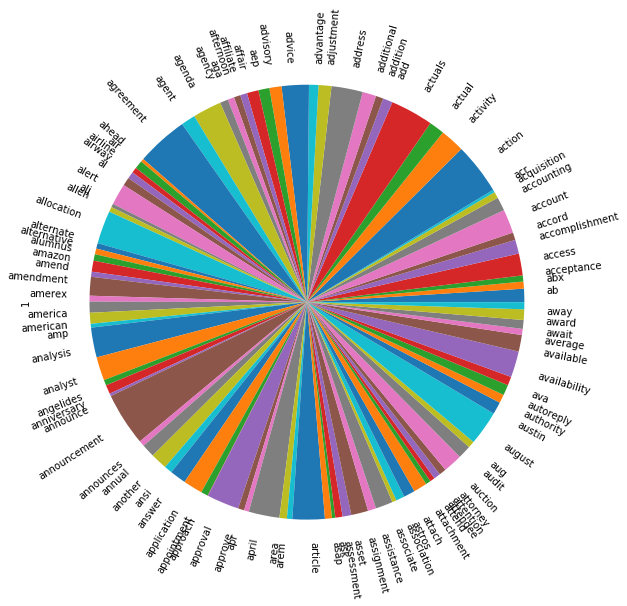

In [ ]:
colonnes=df_subject_highscores_tot.columns.to_list()[0:100]
test=df_subject_highscores_tot[colonnes]
test.loc[1].plot(kind='pie',rotatelabels=True,figsize=(20,10))

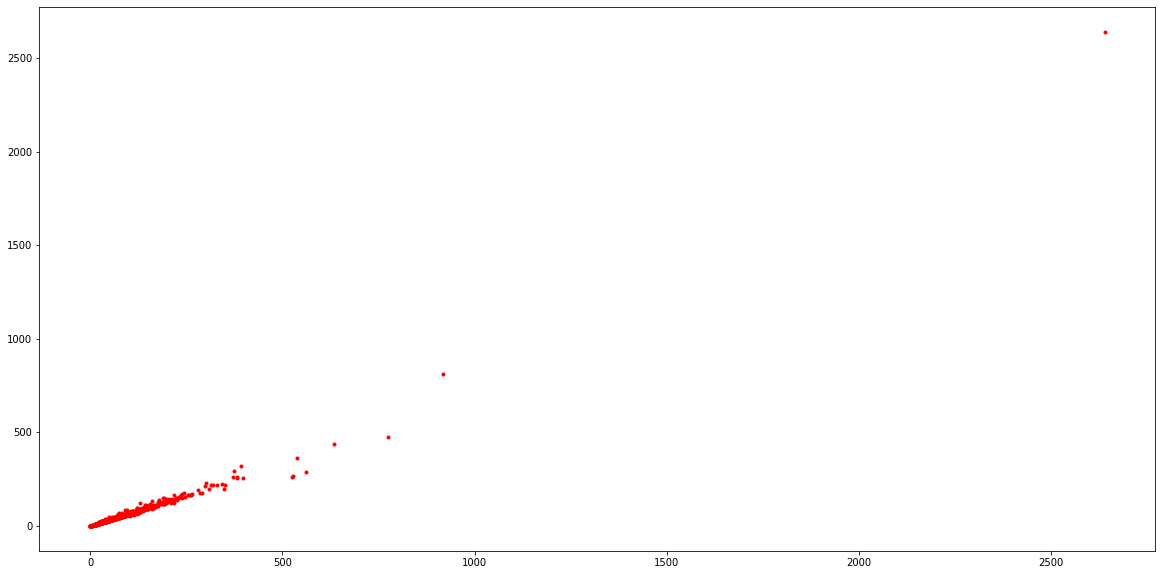

In [ ]:
colonnes=df_subject_highscores_tot.columns.to_list()
test=df_subject_highscores_tot[colonnes]
plt.plot(test.iloc[0].values,test.iloc[1].values,'r.')

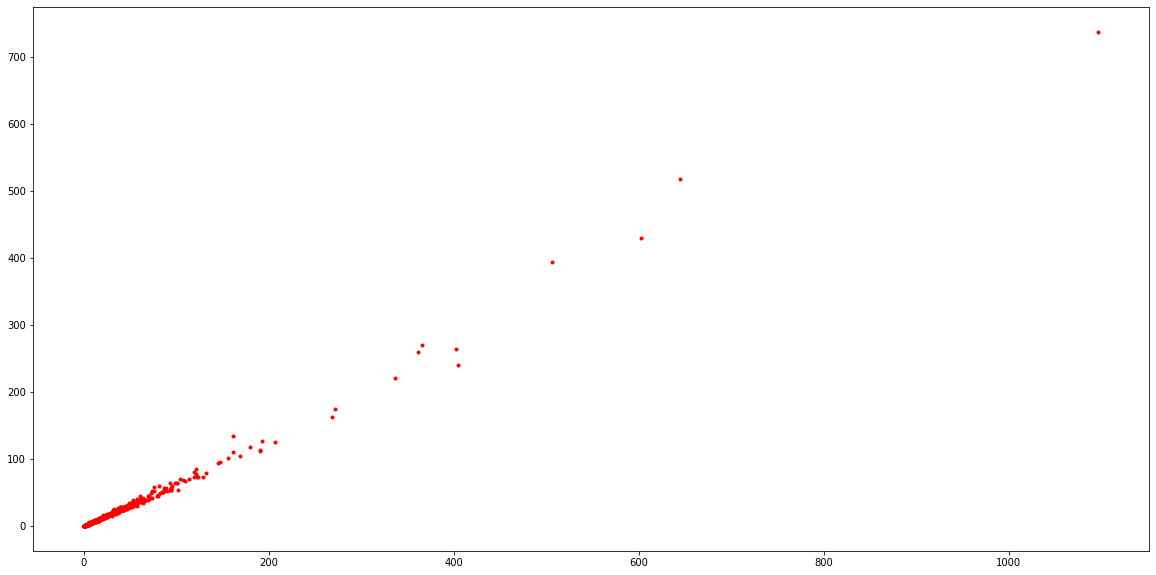

In [ ]:
colonnes=df_mail_highscores_tot.columns.to_list()
test=df_mail_highscores_tot[colonnes]
plt.plot(test.iloc[0].values,test.iloc[1].values,'r.')

In [ ]:
liste_words_high_subject=[]
for (indice,elem) in zip(df_subject_highscores_tot.columns,df_subject_highscores_tot.iloc[1]):
  #print(elem,indice)
  if elem>80:
    liste_words_high_subject.append(indice)

In [ ]:
words_plus_present_subject=df_subject_highscores_tot[liste_words_high_subject]

In [ ]:
words_plus_present_subject.shape

(2, 179)

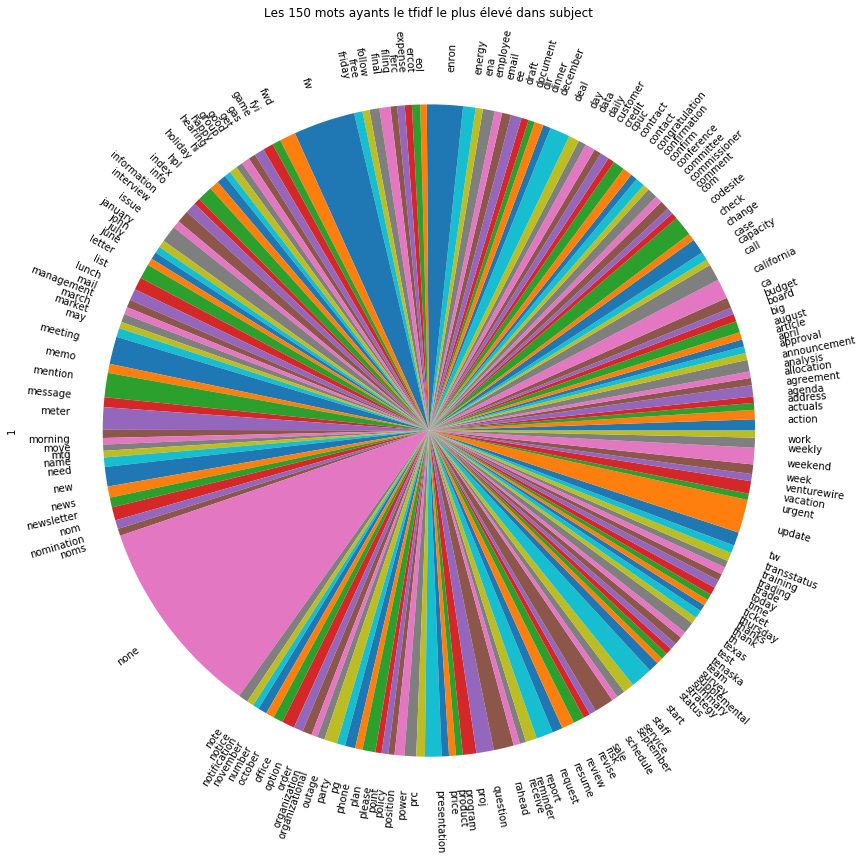

In [ ]:
words_plus_present_subject.loc[1].plot(kind='pie',rotatelabels=True,figsize=(30,15),title='Les 150 mots ayants le tfidf le plus élevé dans subject')
plt.savefig('mots_subject.png',dpi=200)

In [ ]:
result = df_subject_allscores_tot.iloc[1].argsort() 
result=result[::-1]
liste_ordre_columns=df_subject_allscores_tot.columns[result].to_list()
liste_mots_frequent_subject=df_subject_allscores_tot[liste_ordre_columns].T
liste_mots_frequent_subject.rename(columns={0:'Nb_fois_score',1:'Somme_par_mots_des_scores'},inplace=True)
print(liste_mots_frequent_subject.shape)
liste_mots_frequent_subject.head(20)
liste_mots_frequent_subject.to_csv("liste_1500mots_subject.csv",index=False)

(1500, 2)


In [ ]:
result = df_mail_allscores_tot.iloc[1].argsort() 
result=result[::-1]
liste_ordre_columns=df_mail_allscores_tot.columns[result].to_list()
liste_mots_frequent_mail=df_mail_allscores_tot[liste_ordre_columns].T
liste_mots_frequent_mail.rename(columns={0:'Nb_fois_score',1:'Somme_par_mots_des_scores'},inplace=True)
print(liste_mots_frequent_mail.shape)
liste_mots_frequent_mail.head(20)
liste_mots_frequent_mail.to_csv("liste_1500mots_mail.csv",index=False)

(1500, 2)


In [ ]:
result = words_plus_present_subject.iloc[1].argsort() 
result=result[::-1]

In [ ]:
liste_ordre_columns=words_plus_present_subject.columns[result].to_list()

In [ ]:
liste_mots_frequent_subject=words_plus_present_subject[liste_ordre_columns].T

In [ ]:
liste_mots_frequent_subject.rename(columns={0:'Nb_fois_high_score',1:'Somme_par_mots_des_scores'},inplace=True)

In [ ]:
liste_mots_frequent_subject.head()

,Nb_fois_high_score,Somme_par_mots_des_scores
none,2639.0,2639.000000
fw,917.0,814.155466
enron,775.0,473.480025
update,634.0,440.385984
meeting,537.0,362.423080


In [ ]:
liste_mots_frequent_subject.to_csv("liste_mots_frequent_subject.csv")

In [ ]:
liste_words_high_mail=[]
for (indice,elem) in zip(df_mail_highscores_tot.columns,df_mail_highscores_tot.iloc[1]):
  #print(elem,indice)
  if elem>50:
    liste_words_high_mail.append(indice)

In [ ]:
words_plus_present_mail=df_mail_highscores_tot[liste_words_high_mail]

In [ ]:
words_plus_present_mail.shape

(2, 58)

In [ ]:
result = words_plus_present_mail.iloc[1].argsort() 
result=result[::-1]

In [ ]:
liste_ordre_columns=words_plus_present_mail.columns[result].to_list()

In [ ]:
liste_mots_frequent_mail=words_plus_present_mail[liste_ordre_columns].T

In [ ]:
liste_mots_frequent_mail.rename(columns={0:'Nb_fois_high_score',1:'Somme_par_mots_des_scores'},inplace=True)

In [ ]:
liste_mots_frequent_mail.head()

,Nb_fois_high_score,Somme_par_mots_des_scores
com,1097.0,737.859406
image,645.0,518.743021
ee,603.0,430.111027
xl,506.0,393.992504
hpl,366.0,270.736739


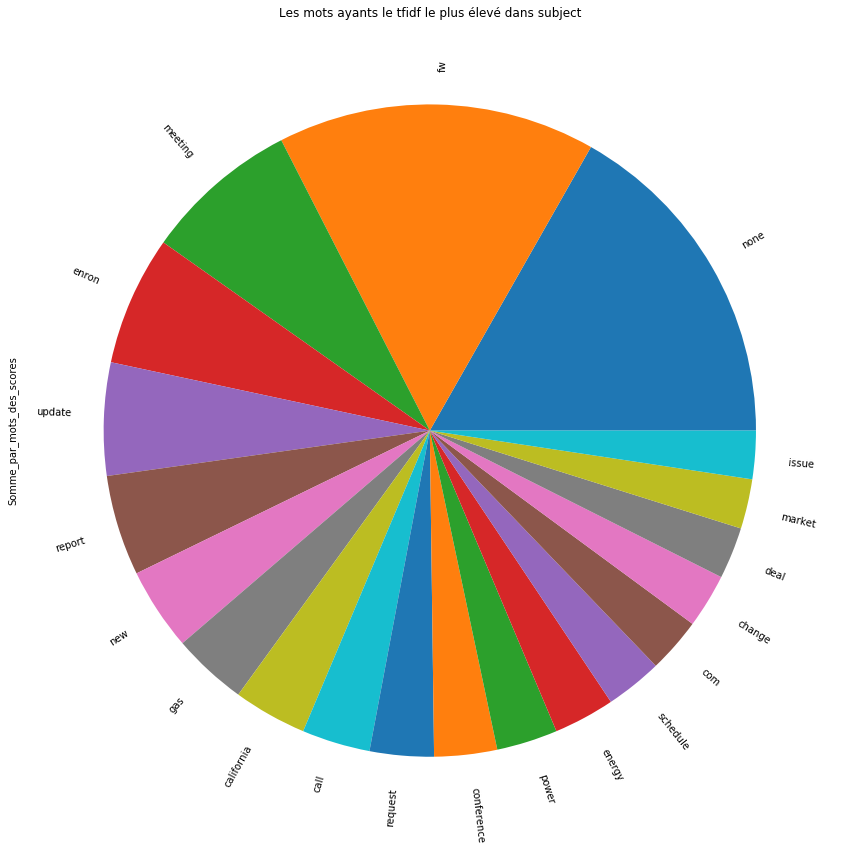

In [ ]:
liste_mots_frequent_subject['Somme_par_mots_des_scores'][0:20].plot(kind='pie',rotatelabels=True,figsize=(30,15),title='Les mots ayants le tfidf le plus élevé dans subject')
#plt.savefig('liste_mots_subjects.png',dpi=200)

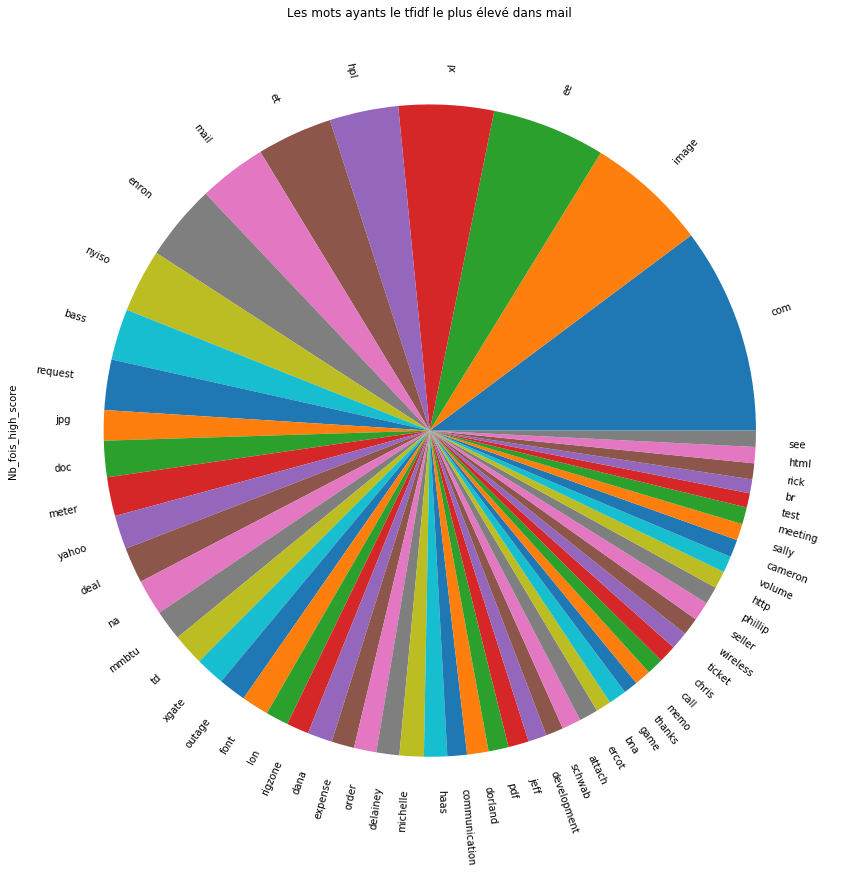

In [ ]:
liste_mots_frequent_mail['Nb_fois_high_score'].plot(kind='pie',rotatelabels=True,figsize=(30,15),title='Les mots ayants le tfidf le plus élevé dans mail')
plt.savefig('liste_mots_mail.png',dpi=200)

In [ ]:
liste_mots_frequent_mail.to_csv("liste_mots_frequent_mail.csv")

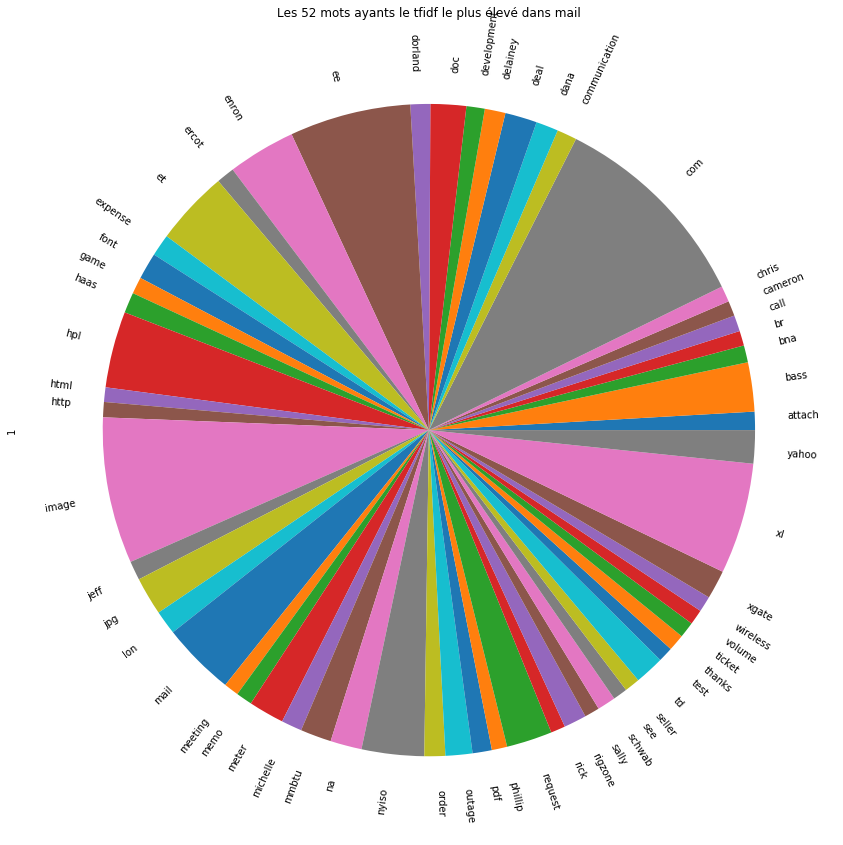

In [ ]:
words_plus_present_mail.loc[1].plot(kind='pie',rotatelabels=True,figsize=(30,15),title='Les 52 mots ayants le tfidf le plus élevé dans mail')
plt.savefig('mots_mail.png',dpi=200)

In [ ]:
words_plus_present_mail.columns.to_list()

['attach',
 'bass',
 'bna',
 'br',
 'call',
 'cameron',
 'chris',
 'com',
 'communication',
 'dana',
 'deal',
 'delainey',
 'development',
 'doc',
 'dorland',
 'ee',
 'enron',
 'ercot',
 'et',
 'expense',
 'font',
 'game',
 'haas',
 'hpl',
 'html',
 'http',
 'image',
 'jeff',
 'jpg',
 'lon',
 'mail',
 'meeting',
 'memo',
 'meter',
 'michelle',
 'mmbtu',
 'na',
 'nyiso',
 'order',
 'outage',
 'pdf',
 'phillip',
 'request',
 'rick',
 'rigzone',
 'sally',
 'schwab',
 'see',
 'seller',
 'td',
 'test',
 'thanks',
 'ticket',
 'volume',
 'wireless',
 'xgate',
 'xl',
 'yahoo']